In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("car driving risk analysis.csv")
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [5]:
df.describe()

,speed,risk
count,15.000000,15.000000
mean,179.666667,55.800000
std,92.687391,35.827364
min,30.000000,2.000000
25%,102.500000,19.000000
50%,190.000000,60.000000
75%,250.000000,88.000000
max,310.000000,98.000000


In [9]:
row,col = df.shape


2

In [10]:
row

15

In [11]:
col

2

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.columns

Train shape: (9, 2)
Test shape: (6, 2)


Index(['speed', 'risk'], dtype='object')

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [23]:
x_train = train_df[['speed']]
y_train = train_df[['risk']]

In [24]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
# Predict risk for the test set
x_test = test_df[['speed']]
y_test = test_df[['risk']]
test_df['predicted_risk'] = reg.predict(x_test)
test_df.head()

,speed,risk,predicted_risk
9,260,91,82.142764
11,185,59,58.198756
0,200,95,62.987557
13,95,18,29.465946
5,115,10,35.851015


Mean Squared Error: 353.7541207082813
Mean Absolute Error: 15.630484610347084
R-squared: 0.6674201309542953


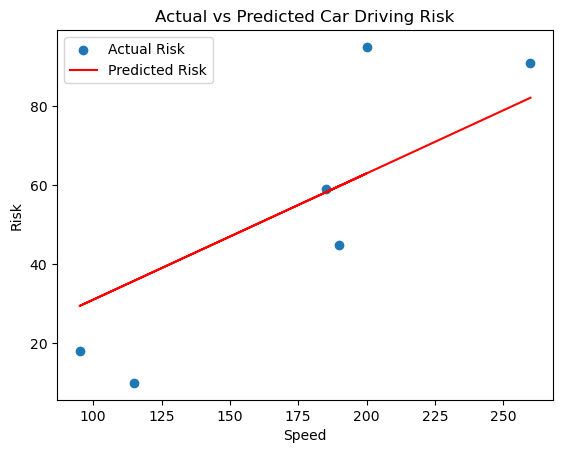

In [35]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, test_df['predicted_risk'])
mae = mean_absolute_error(y_test, test_df['predicted_risk'])
r2 = r2_score(y_test, test_df['predicted_risk'])

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Plot actual vs predicted risk
plt.scatter(x_test, y_test, label='Actual Risk')
plt.plot(x_test, test_df['predicted_risk'], color='red', label='Predicted Risk')
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Actual vs Predicted Car Driving Risk')
plt.legend()
plt.show()

In [47]:

predicted_values = reg.predict([[270], [250], [200], [50], [100]])
for speed, pred in zip([270, 250, 200, 50, 100], predicted_values):
    print(f"Predicted risk for speed {speed} km/h: {pred[0]:.2f}")

Predicted risk for speed 270 km/h: 85.34
Predicted risk for speed 250 km/h: 78.95
Predicted risk for speed 200 km/h: 62.99
Predicted risk for speed 50 km/h: 15.10
Predicted risk for speed 100 km/h: 31.06


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
reg.score(x_test, y_test)

0.6674201309542953